fitnesses [17.229751361589145, 5.42400963618418, 0.2840518806516558]
fitnesses [207.62317536684702, 6.773247928879108, 0.2944274753239794]
fitnesses [214.10199582040212, 6.773247928879108, 0.2994095409199778]
fitnesses [220.57583420836127, 6.773247928879108, 0.3039038525430393]
fitnesses [227.04517828469733, 6.773247928879108, 0.3039038525430393]
fitnesses [233.51452236103339, 6.773247928879108, 0.3692265079154024]
fitnesses [239.91854378199707, 6.773247928879108, 0.3895674900701525]
fitnesses [246.30222422080604, 6.773247928879108, 0.44202541629785685]
fitnesses [252.6334467333873, 6.773247928879108, 0.44202541629785685]
fitnesses [258.96466924596854, 6.773247928879108, 0.47685194260335656]
fitnesses [265.2610652322442, 6.773247928879108, 0.5191981689266323]
fitnesses [271.5151149921967, 6.773247928879108, 0.5222750851050343]
fitnesses [277.7660878359708, 6.773247928879108, 0.5222750851050343]
fitnesses [284.0170606797449, 6.773247928879108, 0.5414562087645565]
fitnesses [290.24885239

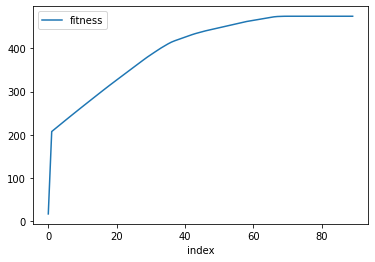

In [315]:
import random as r
import numpy as np
import pandas as pd
def buatbiner():
  x = ''; i = 0
  while (i<10):
    y = r.randint(0,1)
    x = x + str(y)
    i=i+1
  return x

def dekodebinerx1(binernya):
  sumbawah = []; sumsamping = []; i = 0; p = 0
  rb = -1*1; ra = 2; angka = 1
  for n in range(len(binernya)):
    sumbawah.append(pow(2,-1*angka))
    angka+=1

  angka = 1
  for i in range(len(binernya)):
    g = binernya[p]
    if g =='1':
      sumsamping.append(1*(pow(2,-1*angka)))
    elif g =='0':
      sumsamping.append(0*(pow(2,-1*angka)))
    angka+=1
    p=p+1
  
  x = rb + (((ra-rb)/sum(sumbawah))*sum(sumsamping))
  return x

def dekodebinerx2(binernya):
  sumbawah = []; sumsamping = []; i = 0; p = 0
  rb = -1*1; ra = 1; angka = 1
  for n in range(len(binernya)):
    sumbawah.append(pow(2,-1*angka))
    angka+=1

  angka = 1
  for i in range(len(binernya)):
    g = binernya[p]
    if g =='1':
      sumsamping.append(1*(pow(2,-1*angka)))
    elif g =='0':
      sumsamping.append(0*(pow(2,-1*angka)))
    angka+=1
    p=p+1
  x = rb + (((ra-rb)/sum(sumbawah))*sum(sumsamping))
  return x

import math as m
def fitness(x1,x2):
  c = 3
  h = (m.cos(dekodebinerx1(x1))*m.cos(dekodebinerx2(test2)))-(dekodebinerx1(x1)/(pow(dekodebinerx2(test2),2)+1))
  fitness = pow(c,-1*h)
  return fitness

def buatpopulasi(banyak):
  populasi = []; x=0
  while (x<banyak):
    x1 = buatbiner(); x2= buatbiner()
    kromosom = x1+x2
    fit = fitness(x1,x2)
    dx1 = dekodebinerx1(x1)
    dx2 = dekodebinerx2(x2)
    populasi.append([kromosom,dx1,dx2,fit])
    x=x+1
  return populasi

def evaluate(sebuahpopulasi):
  i = 0; sum = 0; worst = float(sebuahpopulasi[i][3])
  best = float(sebuahpopulasi[i][3])
  while (i<len(sebuahpopulasi)):
    if sebuahpopulasi[i][3]> best:
      best = sebuahpopulasi[i][3]
    if sebuahpopulasi[i][3]< worst:
      worst = sebuahpopulasi[i][3]
    sum = sum + float(sebuahpopulasi[i][3])
    i+=1
  return [sum, best, worst] 

def elitism(sebuahpopulasi, fitnesses):
  asebuahpopulasi = sebuahpopulasi.copy()
  elite = []; elitis = []; j = 0; best = 0; secondbest = 0
  rowbest = 0; rowsecondbest = 0; rowworst = 0
  if len(sebuahpopulasi)%2==0:
    #mencopy isi populasi awal
    for i in range(np.size(asebuahpopulasi,0)):
      elite.append(asebuahpopulasi[j][3])
      j+=1
    #mencari best fitness
    best = max(elite); j = 0
    for i in range(len(elite)):
      if (elite[j] == best):
        rowbest = j
      j+=1
    # kalo ini ditukar
    asebuahpopulasi[rowworst]=(asebuahpopulasi[rowbest])

    #membuat copy satu lagi
    secondbest = max(elite); k = 0
    for i in range(len(elite)):
      if (elite[k] == secondbest):
        rowsecondbest = k
      k+=1
    asebuahpopulasi = sebuahpopulasi.copy()
    j=0; rowworst = 0
    for i in range(len(asebuahpopulasi)):
      elite.append(asebuahpopulasi[j][3])
      j+=1
    best = min(elite); j = 0
    for i in range(len(asebuahpopulasi)):
      if (elite[j] == best):
        rowworst = j
      j+=1
    asebuahpopulasi[rowworst]=(asebuahpopulasi[rowbest])
  else:
    elite = []; elitis = []; j = 0; best = 0; secondbest = 0
    for i in range(len(asebuahpopulasi)):
      elite.append(asebuahpopulasi[j][3])
      j+=1
    best = max(elite); j = 0
    for i in range(len(elite)):
      if (elite[j] == best):
        rowbest = j
      j+=1
    asebuahpopulasi[rowworst]=(asebuahpopulasi[rowbest])

  return asebuahpopulasi

def kumulatif(sebuahpopulasi):
  fitnessdoang = []; j = 0
  for i in range(len(sebuahpopulasi)):
    fitnessdoang.append(fitness(sebuahpopulasi[j][0][:10],sebuahpopulasi[j][0][10:]))
    j+=1
  return fitnessdoang

def roulettewheel(sebuahpopulasi):
  angka = 1
  fitn = kumulatif(sebuahpopulasi)
  totalfit = float(sum(fitn))
  relatiffitn = [(f/totalfit) for f in fitn]
  probabiliti = [sum(relatiffitn[:i+1]) for i in range(len(relatiffitn))]
  terpilih = []
  for n in range(angka):
    ra = r.random()
    for (i, individual) in enumerate(sebuahpopulasi):
      if ra <= probabiliti[i]:
        terpilih.append(list(individual))
        break
  return terpilih[0]  # output berbentuk individu

def crossover(parent1, parent2, pC):
  binerortu1 = ''
  binerortu1 = parent1
  binerortu2 = parent2
  probc = pC
  randprob = r.uniform(0.0,1.0)
  gen = 0
  if randprob > probc:
    a = r.randint(0,19)
    terambilparent1 = binerortu1[0][a:]
    terambilparent2 = binerortu2[0][:a]
    newmix = terambilparent1 + terambilparent2
  else:
    newmix = r.choice([binerortu1[0],binerortu2[0]])

  test1 = newmix[:10]; test2 = newmix[10:]
  dx11 = dekodebinerx1(test1)
  dx22 = dekodebinerx2(test2)
  test1test2 = test1+test2
  newmix = ([test1test2,dx11,dx22,fitness(test1,test2)])
  return newmix

def mutate(anakcrossover, pM):
  anak = list(anakcrossover[0])
  probm = pM;  korban = 0
  randprob = r.uniform(0.0,1.0)
  if randprob > probm:
    korban = r.randint(0,19)
    if anak[korban]=='0':
      anak[korban]='1'
    else:
      anak[korban]='0'
    s = ''; anak = s.join(anak)
  else:
    s = ''; anak = s.join(anak)
  test1 = anak[0:10]; test2 = anak[10:20]
  dx1 = dekodebinerx1(test1)
  dx2 = dekodebinerx2(test2)
  test1test2 = test1+test2
  anak = ([test1test2,dx1,dx2,fitness(test1,test2)])
  return anak

def bestindividual(sebuahpopulasi):
  sel = []; max = 0; j = 0
  for i in range(len(sebuahpopulasi)):
    if max < sebuahpopulasi[j][3]:
      max = j
    j+=1
  return sebuahpopulasi[max]

def generationalreplacement(G,N):
  df = pd.DataFrame(columns=['index','fitness']); bestgen = 0; after = 0
  population = buatpopulasi(8); iterator = 0; keep = []; fitnesses = 0
  bc = bestindividual(population)
  while iterator < G :    
    fitnesses = evaluate(population)
    print('fitnesses',fitnesses) # print nilai fitness
    keep.append(fitnesses)  # menyimpan nilai fitness
    newPop = elitism(population,fitnesses)
    while np.size(newPop,0) < N:
      parent1 = roulettewheel(population); parent2 = roulettewheel(population)
      offspring1 = crossover(parent1, parent2, 0.6)
      offspring2 = crossover(parent1, parent2, 0.6)
      offspring1 = mutate(offspring1, 0.4)
      offspring2 = mutate(offspring2, 0.4)
      newPop.append(offspring1)
      newPop.append(offspring2)
    population = newPop
    iterator+=1
  
  # menyimpan data dalam bentuk DataFrame agar dapat dibuat line graph
  j = 0; k = 0
  for i in range(G):
    fittot = keep[j][0]
    barisbaru = {'index':j,
                 'fitness':fittot}
    df = df.append(barisbaru,ignore_index=True)
    len(df)
    j+=1
    
  print('\n\nInvdividu terbaik: ')
  print('Kromosom:',bc[0])
  print('x1:',dekodebinerx1(bc[0][0:10]))
  print('x2:',dekodebinerx2(bc[0][10:20]))
  print('Nilai fitness:',bc[3])
  
  return df

import matplotlib.pyplot as plt
liat = (generationalreplacement(90,70)) # brp generasi, brp kromosom
df = liat
ax = plt.gca()
df.plot(kind='line',x='index',y='fitness',ax=ax)
plt.show()